<a href="https://colab.research.google.com/github/AlanMarquesRocha/pv_cells_detection_fault/blob/main/cnn_classification_semin%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exportação e filtragem dos dados de Células de Placas solares:

##Clonando o repositório:

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split

In [1]:
!git clone https://github.com/zae-bayern/elpv-dataset.git

Cloning into 'elpv-dataset'...
remote: Enumerating objects: 2695, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2695 (delta 2), reused 7 (delta 1), pack-reused 2686
Receiving objects: 100% (2695/2695), 90.79 MiB | 25.61 MiB/s, done.
Resolving deltas: 100% (32/32), done.


##Adicionando os caminhos necessários para acessar a base :

In [2]:
import sys
sys.path.append('elpv-dataset')
sys.path.append('elpv-dataset/utils')

##Importando a base:

In [3]:
from elpv_reader import load_dataset
images, proba, types = load_dataset()

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers


# Carrega os dados
images, proba, types = load_dataset()

# Separa os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(images, proba, test_size=0.2, random_state=42)

# number of filters for each convolution layer (filters)
c_entrada = [64, 32]

# number of neurons in fully connected layers:
c_dense = [120, 120, 2]

# defining the kernel:
kernel = (3, 3)

# convolution steps (stride)
strd = 1

# defining the activation function of the convolution layers:
act_func = 'relu'

# setting the cnn classifier activation function
act_func_class = 'softmax'

# starting the model
model_cnn = models.Sequential()


# 1st CNN convolution layer
model_cnn.add(layers.Conv2D(c_entrada[0], kernel, strd, activation = act_func, input_shape=(300, 300, 1)))
# 1st CNN Pooling layer (maximum pooling applies)
model_cnn.add(layers.MaxPooling2D((2,2), padding = 'same'))


# 2st CNN convolution layer
model_cnn.add(layers.Conv2D(c_entrada[1], kernel, strd, activation = act_func))
# 2st CNN Pooling layer (maximum pooling applies)
model_cnn.add(layers.MaxPooling2D((2,2), padding = 'same'))


# Conversion of attribute matrix to attribute vector
model_cnn.add(layers.Flatten())


# 1st layer fully connected:
model_cnn.add(layers.Dense(c_dense[0], activation = act_func))
# 2st layer fully connected:
model_cnn.add(layers.Dense(c_dense[1], activation = act_func))

# Last layer of classifier with softmax activation function.
model_cnn.add(layers.Dense(c_dense[2], activation = act_func_class))
                          


In [41]:
# Apresenta o sumário das camadas da CNN
model_cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 298, 298, 64)      640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 149, 149, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 147, 147, 32)      18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 175232)            0         
                                                                 
 dense_22 (Dense)            (None, 120)              

In [ ]:
# definindo o tipo de otimizador e métrica para verificar a assertividade do modelo.
model_cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',
            metrics = ['accuracy'])
     

# definindo o número de épocas
epochs = 50

# showing the network training loss and accuracy at each epoch
history = model_cnn.fit(X_train, y_train, batch_size = 10, epochs = epochs)
     

Epoch 1/50
 24/210 [==>...........................] - ETA: 6:59 - loss: 116.1866 - accuracy: 0.5167

##Verificando a distribuição de células mono e policristalinas:

In [4]:
num_policristalinas = sum(1 for t in types if t == 'poly')
num_monocristalinas = sum(1 for t in types if t == 'mono')

In [5]:
num_policristalinas

1550

In [6]:
num_monocristalinas

1074

##Destacando as imagens de celulás policristalinas e suas respectivas probabilidades de defeito:

In [7]:
policristalinas = [image for image, module_type in zip(images, types) if module_type == 'poly']

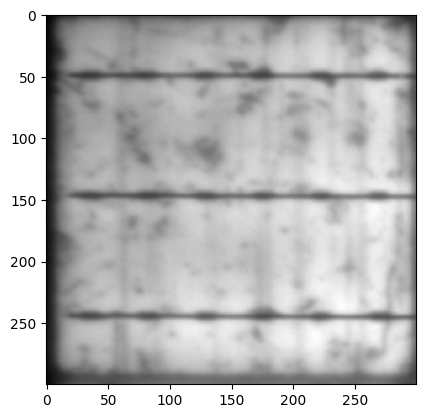

In [8]:
from matplotlib import pyplot as plt

k = 450
plt.imshow(policristalinas[k], cmap='gray');



In [11]:
probabilidades = [prob for prob, module_type in zip(proba, types) if module_type == 'poly']

In [12]:
print('probabilidade de defeito da imagem:',probabilidades[k])

probabilidade de defeito da imagem: 1.0


##Separando os dados em treino e teste, sendo X as imagens e Y as probabilidades: